In [5]:
import numpy as np
import cv2  as cv
from matplotlib import pyplot as plt

In [6]:
fig = plt.figure
subplot = plt.subplot
imshow = plt.imshow
imread = cv.imread

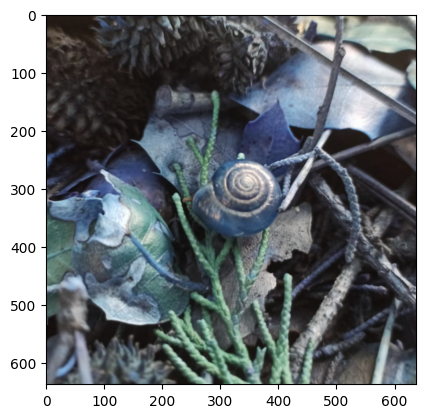

In [7]:
I = imread("../images/I2.png")
fig()
imshow(I)
#Opencv renk formatı BGR oldugundan dolayı görüntü aşağıdaki gibi olur.  

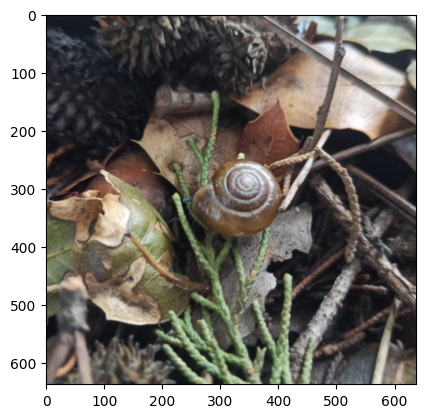

In [8]:
I = imread("../images/I2.png")
I_rgb = cv.cvtColor(I,cv.COLOR_BGR2RGB)
fig()
imshow(I_rgb)

(<Axes: >, <matplotlib.image.AxesImage at 0x17b14360b80>)

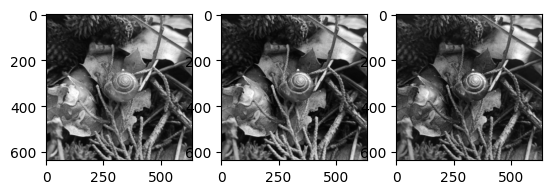

In [9]:
subplot(1,3,1) , imshow(I_rgb[:,:,0] , cmap = "gray") #0. yani Red kanali
subplot(1,3,2) , imshow(I_rgb[:,:,1] , cmap = "gray") #1. yani Red kanali
subplot(1,3,3) , imshow(I_rgb[:,:,2] , cmap = "gray") #2. yani Red kanali

Yukarıdaki 1. resim Red renk kanalının fotoğrafıdır. Rengin baskın olduğu yerler daha beyaz 255'e yakın renklerdir. Örnğin salyangoz kabuğu R kanalında beyaz görünürken B kanalında siyah, 0 tonlarında gözükmüşyür bunun sebebi mavi rengin salyangoz kabuğunda pek bulunmamasından kaynaklanmaktadır.

<h3>Exponansiyel Fonksiyon</h3>
Exponansiyel fonksiyon e^x dir bunu pythonda numpy.exp(<üste yazılacak değerler>) şeklinde elde ederiz.

<img src= "1.1.png">


<h3>Yeni fonksiyonlar ve Anlamları</h3>

>Aşağıdaki resmi ve kodu verilen fonksiyon 0-55 arasındaki girdilerin değerini aydınlatması istenmekte ve diğerlerini siyah yapmak istemektedir. Lakin bunu statik modda sağlayamaz çünkü fonksiyonu inceleyeceğiniz üzere 25 değerini 1'e çekiyor ve beyaz renk değildir, 255'e çekmesi gerekiyordu. Dolayısıyla bu kod için imshow yaparken dinamik mod kullanmalıyız. Böylece en yüksek değer olan 1, 255'e map edilecektir. 

<img src= "1.4.JPG">

<img src= "1.2.JPG">
<img src= "1.3.JPG">

(<Axes: >, <matplotlib.image.AxesImage at 0x17b16d51c90>)

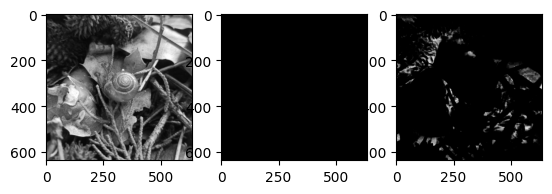

In [21]:
I = imread("../images/I2.png")
I_rgb = cv.cvtColor(I,cv.COLOR_BGR2RGB)

def exp_fun(x , c = 10 , sg = 5):
    return np.exp( -(x-c)**2/(2*sg**2))

I_tmp = I_rgb[:,:,0].astype("float")
I_r = exp_fun(I_tmp)

fig()
subplot(1,3,1), imshow(I_tmp, cmap = "gray")
subplot(1,3,2), imshow(I_r, cmap = "gray", vmin = 0, vmax = 255)
subplot(1,3,3), imshow(I_r, cmap = "gray")


<h5>Statik olan modda düzgün görüntü elde etmek fonksiyonu nasıl değiştirmeliyiz?</h5>

Eğer exp_fun fonksiyonunun geri döndürdüğü değeri 255 ile çarparsak doğru bir yöntem izlemi şoluruz

(<Axes: >, <matplotlib.image.AxesImage at 0x17b16aad9f0>)

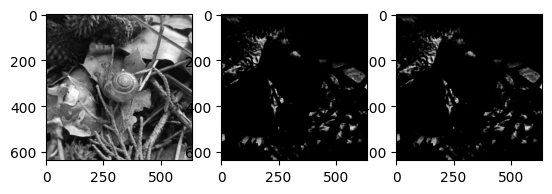

In [20]:
I = imread("../images/I2.png")
I_rgb = cv.cvtColor(I,cv.COLOR_BGR2RGB)

def exp_fun(x , c = 10 , sg = 5):
    return 255* np.exp( -(x-c)**2/(2*sg**2))

I_tmp = I_rgb[:,:,0].astype("float")
I_r = exp_fun(I_tmp)

fig()
subplot(1,3,1), imshow(I_tmp, cmap = "gray")
subplot(1,3,2), imshow(I_r, cmap = "gray", vmin = 0, vmax = 255)
subplot(1,3,3), imshow(I_r, cmap = "gray")

<h5>Bu şekilde verilmiş olan fonksiyon görüntüde neye sebep olur?</h5>
<img src="1.5.JPG">

Cevap: Dikkat ederseniz x = 0 için y =255, x = 255 için y = 0 olacak şekilde doğrusal bir fonksiyondur.
<br>Tahmin edildiği üzere reverse alınmasını, renklerin tam tersi olmasını sağlar.

(<Axes: >, <matplotlib.image.AxesImage at 0x17b16cdca60>)

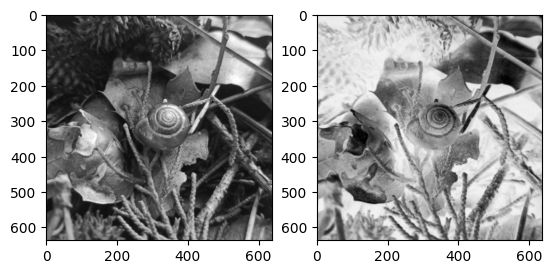

In [22]:
I_tmp2 = I_rgb.astype("float").mean(2) #mean(2) demek elimizdeki görüntüde kanal boyunca ortalama alıyor.)

# y = 255-x doğrusu
Iy = 255 - I_tmp
fig()
subplot(1,2,1) , imshow(I_tmp2, cmap= "gray", vmin = 0, vmax = 255)
subplot(1,2,2) , imshow(Iy, cmap = "gray", vmin = 0, vmax = 255)


<h5>Bu şekilde verilmiş olan fonksiyon görüntüde neye sebep olur?</h5>
<img src="1.7.JPG">

Cevap: Dikkat edersek 0-100 arasındaki koyu renkler aynen korunmuştur çünkü 45 derecelik açıya sahiptir eğim 1'dir. 
<br> 100-255 arasındaki renkler ise 255'e yani beyaza sabitlenmiş olur.

(<Axes: >, <matplotlib.image.AxesImage at 0x17b1b76eec0>)

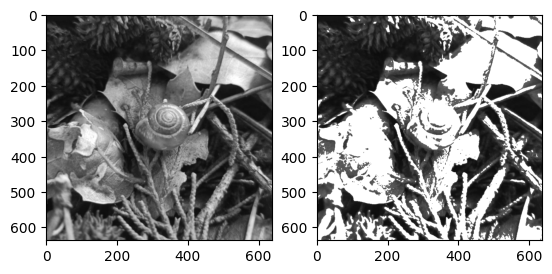

In [32]:
I_y = np.zeros_like(I_tmp) #0'lardan oluşan bir çıkış görüntüsü oluşturduk

Imask1 = I_tmp < 100 #I_tmp nin 100den küçük olan indisleri bul
I_y[Imask1] = I_tmp[Imask1] #küçük olam indislerin değerlerini doğrudan ata

Imask2 = I_tmp >= 100
I_y[Imask2] = 255 #büyük olan indisleri beyaz ata

fig()

subplot(1,2,1) , imshow(I_tmp, cmap = "gray", vmin = 0, vmax = 255)
subplot(1,2,2) , imshow(I_y, cmap = "gray", vmin = 0, vmax = 255)

<h2>HİSTOGRAM</h2>

Histogram en genel anlamda elimizdeki bir kümenin içerisindeki nesneleri saymaktır. 

Örneği aşağıdaki resimde tabloya bakarsak 0 renk koduna sahip 860 tane pixel, 1 renk koduna sahip 240 tane pixel, 2 renk koduna sahip 40 tane pixel ... var şeklinde bir yorum yapabiliriz.

<img src = "1.8.JPG">

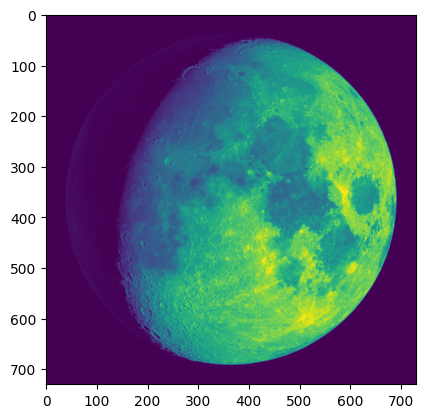

In [38]:
C = imread("../images/C1.jpg", 0)
fig()
imshow(C)

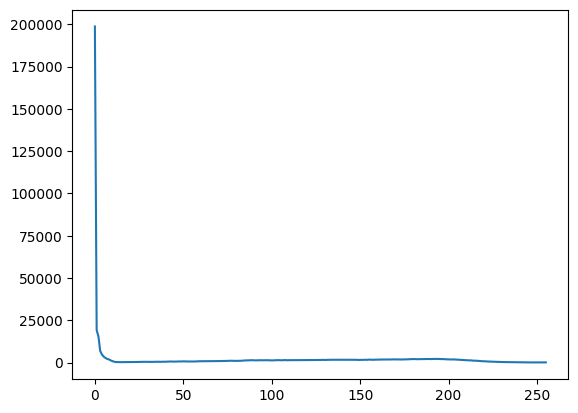

In [39]:
hist_ = np.zeros(256)

for i in range(C.shape[0]):
    for j in range(C.shape[1]):
        pixVal = C[i,j]
        hist_[pixVal] += 1

fig()
plt.plot(hist_)